In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv("income1.csv",names=['name','age','income'],skiprows=[0])

In [14]:
df.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    40 non-null     int64  
 1   age     40 non-null     int64  
 2   income  0 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [ ]:
df.isnull().sum()/len(df)

name      0.0
age       0.0
income    0.0
dtype: float64

<AxesSubplot:xlabel='age', ylabel='income'>

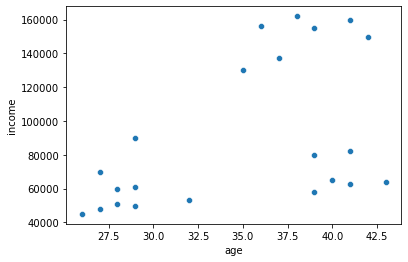

In [4]:
sns.scatterplot(x=df['age'],y=df["income"])

In [5]:
from sklearn.cluster import KMeans

In [17]:
X=df[['age','income']]
X.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [8]:
# Kmeans Clustering Algorithm
km=KMeans(n_clusters=3)
cluster_no=km.fit_predict(X)
cluster_no

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [11]:
df['cluster_num']=cluster_no

In [12]:
df.head()

,name,age,income,cluster_num
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [16]:
df0=df[df['cluster_num']==0]
df1=df[df['cluster_num']==1]
df2=df[df['cluster_num']==2]

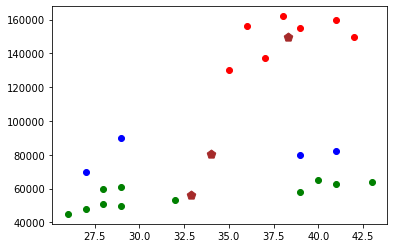

In [24]:
plt.scatter(df0['age'],df0["income"],color="green")
plt.scatter(df1['age'],df1["income"],color="red")
plt.scatter(df2['age'],df2["income"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="brown",marker="p",label="centroid",s=80)
plt.show()

In [ ]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [ ]:
df.head()

,name,age,income,cluster_num
0,Rob,0.058824,70000,0
1,Michael,0.176471,90000,0
2,Mohan,0.176471,61000,2
3,Ismail,0.117647,60000,2
4,Kory,0.941176,150000,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df['age']=sc.fit_transform(df[['age']])
df['income']=sc.fit_transform(df[['income']])

In [ ]:
df.head()

,name,age,income,cluster_num
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


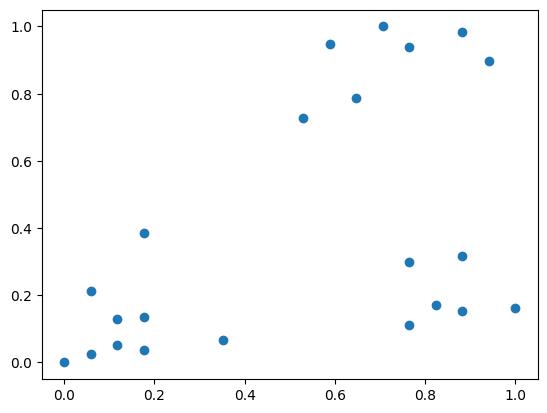

In [ ]:
plt.scatter(x=df['age'],y=df['income'])

In [27]:
# Kmeans Clustering Algorithm
km1=KMeans(n_clusters=3)
y_pred=km1.fit_predict(X)
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [28]:
df['cluster_num_1']=y_pred

In [29]:
df.head()

,name,age,income,cluster_num,cluster_num_1
0,Rob,27,70000,2,0
1,Michael,29,90000,2,0
2,Mohan,29,61000,0,2
3,Ismail,28,60000,0,2
4,Kory,42,150000,1,1


In [30]:
df0=df[df['cluster_num_1']==0]
df1=df[df['cluster_num_1']==1]
df2=df[df['cluster_num_1']==2]

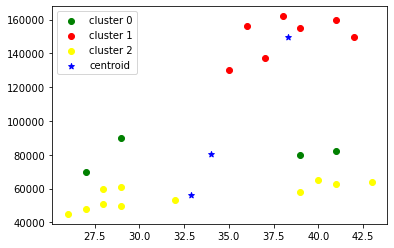

In [31]:
plt.scatter(df0['age'],df0["income"],color="green",label="cluster 0")
plt.scatter(df1['age'],df1["income"],color="red",label="cluster 1")
plt.scatter(df2['age'],df2["income"],color="yellow",label="cluster 2")
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color="blue",marker="*",label="centroid")
plt.legend()
plt.show()

In [32]:
km.labels_

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

# ELBOW METHOD

In [20]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     22 non-null     int64
 1   income  22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [28]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(2,23):
    km = KMeans(n_clusters=k,n_init=10,max_iter=300,random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    

In [31]:
wcss

[3318233941.161905,
 1577046058.8831167,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 177967003.7952381,
 128133608.45,
 96300255.03333333,
 68133457.7,
 42000112.333333336,
 21833432.166666668,
 14291766.333333332,
 10125026.166666668,
 8125016.666666667,
 6125012.166666667,
 4125010.166666667,
 2625007.5,
 1500007.0,
 1000002.5,
 500000.5,
 0.0]

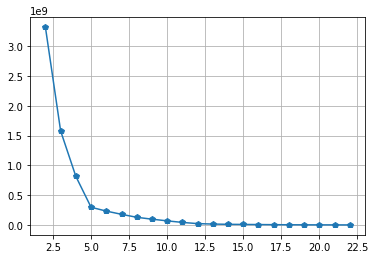

In [32]:
plt.plot(range(2,23),wcss, marker="p")
plt.grid()
plt.show()

In [33]:
km1=KMeans(n_clusters=5)
cluster_num_1=km1.fit_predict(X)


df["Cluster_No"]=cluster_num_1
X=df[['age','income',"Cluster_No"]]

X

,age,income,Cluster_No
0,27,70000,1
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0
5,39,155000,0
6,41,160000,0
7,38,162000,0
8,36,156000,0
9,35,130000,4


In [37]:
df0=X[X['Cluster_No']==0]

df1=X[X['Cluster_No']==1]

df2=X[X['Cluster_No']==2]

df3=X[X['Cluster_No']==3]

df4=X[X['Cluster_No']==4]

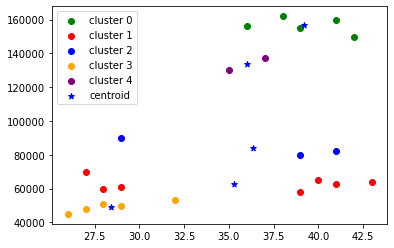

In [38]:
plt.scatter(df0['age'],df0["income"],color="green",label="cluster 0")
plt.scatter(df1['age'],df1["income"],color="red",label="cluster 1")
plt.scatter(df2['age'],df2["income"],color="blue",label="cluster 2")
plt.scatter(df3['age'],df3["income"],color="orange",label="cluster 3")
plt.scatter(df4['age'],df4["income"],color="purple",label="cluster 4")

plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color="blue",marker="*",label="centroid")
plt.legend()
plt.show()

# Optional Elbow Method

In [ ]:
# ELbow method
from sklearn.metrics import silhouette_score
wcss=[]
sil_score={}
k_range=np.arange(2,10,1)
for i in k_range:
  km=KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)
  sil_score[i]=silhouette_score(X,km.labels_,metric="euclidean")


In [ ]:
wcss

[2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2829404587160481,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

In [ ]:
sil_score

{2: 0.5600636053855829,
 3: 0.7129710183539274,
 4: 0.625655419231276,
 5: 0.46631248804199604,
 6: 0.47501742041290596,
 7: 0.4522080792289982,
 8: 0.3580059150146837,
 9: 0.3256374758795554}

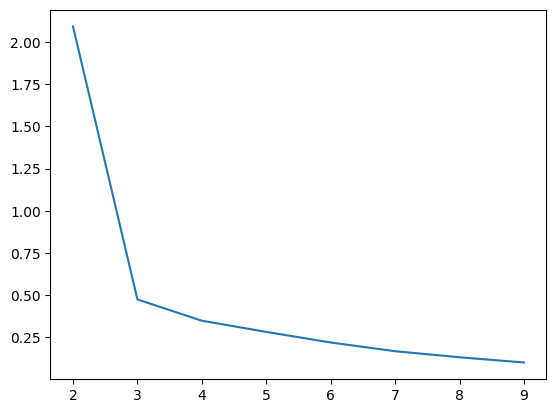

In [ ]:
plt.plot(k_range,wcss)